## Bank account ownership analysis in East Africa

### Import required libraries 

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


from functions import *





### Get data sets 

In [92]:
df = pd.read_csv('financialDataset.csv')
data_des = pd.read_csv('VariableDefinitions.csv')


df.head()

## Data cleaning

In [93]:
#Checking our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


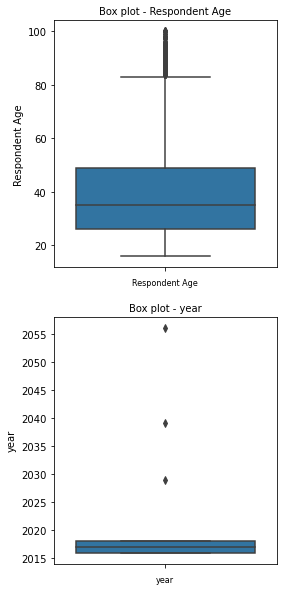

In [94]:
#Checking outliers columns 
#Check the columns with numerical values to see if there are outliers and anormalies
col_names = ['Respondent Age', 'year']

fig, ax = plt.subplots(len(col_names), figsize=(4,10))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - ' + str(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

#This shows that:
#For the Respondage age, 80 and above composed of outliers as they were very few.
# For the year, seems there are some years that were entered by mistake. 


In [95]:
# Remove outliers from the columms using outlier function imported from functions.py file
for col in col_names:
    remove_outliers(df,col)

In [96]:
#Checking for anormalies
#The years under study were 2016 to 2018. But we have some up to 2059. 
# Lets remove them 

df = df[df['year']<=2018]

#We can also remove those whose age is above 80 years 
df = df[df['Respondent Age']<+80]

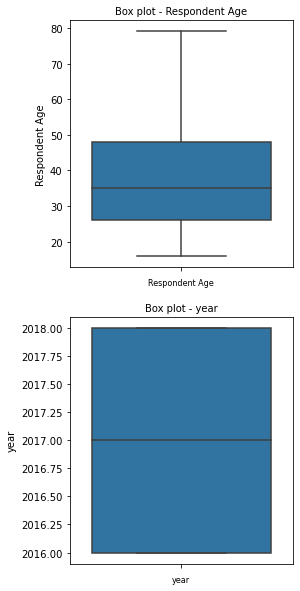

In [97]:
#Check outliers again 
col_names = ['Respondent Age', 'year']

fig, ax = plt.subplots(len(col_names), figsize=(4,10))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - ' + str(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

#Out box plot now looks better

In [98]:
#Checking null values
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        33
Type of Location          14
Cell Phone Access         10
household_size            21
Respondent Age             0
gender_of_respondent      26
The relathip with head     0
marital_status            27
Level of Educuation       25
Type of Job               26
dtype: int64

#### Univariate 

In [99]:

#get all column names 
df_columns = df.columns.to_list()
df_columns



['country',
 'year',
 'uniqueid',
 'Has a Bank account',
 'Type of Location',
 'Cell Phone Access',
 'household_size',
 'Respondent Age',
 'gender_of_respondent',
 'The relathip with head',
 'marital_status',
 'Level of Educuation',
 'Type of Job']

In [100]:
# Drop null values using the finction imported
drop_nans(df, df_columns)

In [101]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

## Analysis

### Functions 

In [102]:
# All functions are found at file functions.py and have been imported to be used here

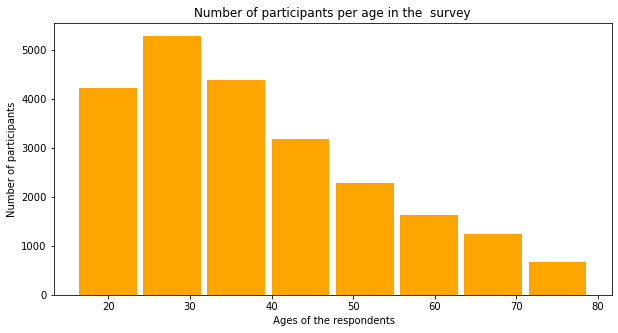

In [103]:
# Ploting the univariate summaries observations
df['Respondent Age'] = df['Respondent Age'].astype(int)

fig = plt.figure(figsize = (10, 5))

plt.hist(df['Respondent Age'], color ='orange', bins=8, rwidth=0.9)
plt.xlabel(" Ages of the respondents")
plt.ylabel("Number of participants")
plt.title("Number of participants per age in the  survey")
plt.show()

<AxesSubplot:ylabel='Has a Bank account'>

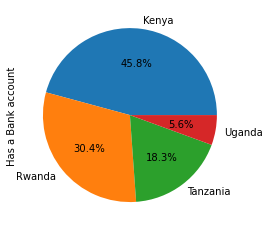

In [104]:
df[df['Has a Bank account']=='Yes'].groupby('country').count()['Has a Bank account'].plot(kind = 'pie',autopct = '%1.1f%%')
#Kenya has the hihest number of people with bank accounts

<AxesSubplot:ylabel='Has a Bank account'>

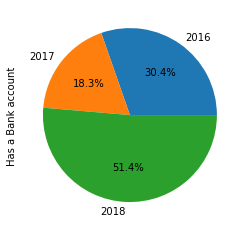

In [105]:
df[df['Has a Bank account']=='Yes'].groupby('year').count()['Has a Bank account'].plot(kind = 'pie',autopct = '%1.1f%%')
#it also shows that 2018 had the highest nmber oof people with bank account.

<AxesSubplot:ylabel='Has a Bank account'>

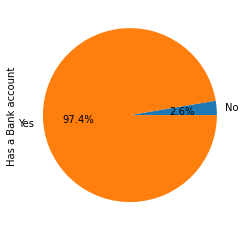

In [106]:
df[df['Has a Bank account']=='Yes'].groupby('Cell Phone Access').count()['Has a Bank account'].plot(kind = 'pie',autopct = '%1.1f%%')
#Its also shows that more than 97% od the people with cell phones have a bank account

<AxesSubplot:ylabel='Has a Bank account'>

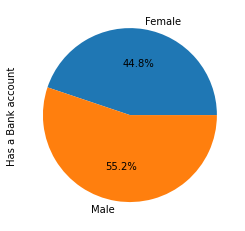

In [107]:
df[df['Has a Bank account']=='Yes'].groupby('gender_of_respondent').count()['Has a Bank account'].plot(kind = 'pie',autopct = '%1.1f%%')
#A sper the gender, more male have bank accounts than female

In [108]:
#Distribution of account holders per country
Account_holders= df.groupby(['country', 'Has a Bank account']).count()['Respondent Age']
Account_holders

country   Has a Bank account
Kenya     No                    4423
          Yes                   1489
Rwanda    No                    7539
          Yes                    987
Tanzania  No                    5771
          Yes                    595
Uganda    No                    1895
          Yes                    181
Name: Respondent Age, dtype: int64

In [109]:
grouped = df.groupby(['country','Has a Bank account']).count()['uniqueid']#.plot(kind='bar')

In [110]:
#Correlation
df.corr()

,year,household_size,Respondent Age
year,1.000000,-0.052634,-0.024301
household_size,-0.052634,1.000000,-0.095980
Respondent Age,-0.024301,-0.095980,1.000000


In [111]:
#Get the columns needed to be converted to numericals
# Our_Columns = list(df.drop(['Has a Bank account','Respondent Age'],axis='columns').columns)
Our_Columns = list(df.drop(['Respondent Age','year','uniqueid'],axis='columns').columns)


In [112]:
#Use this during multivariate analysis

for cols in Our_Columns:
    convert_categorical_cols(df,cols)
    
#The dictionaries diplayed shows each converted categories 
    

{'Kenya': 0, 'Rwanda': 1, 'Tanzania': 2, 'Uganda': 3}
{'Yes': 0, 'No': 1}
{'Rural': 0, 'Urban': 1}
{'Yes': 0, 'No': 1}
{3.0: 0, 5.0: 1, 8.0: 2, 7.0: 3, 1.0: 4, 6.0: 5, 4.0: 6, 10.0: 7, 2.0: 8, 11.0: 9, 9.0: 10, 12.0: 11, 16.0: 12, 15.0: 13, 13.0: 14, 14.0: 15, 21.0: 16, 0.0: 17, 18.0: 18, 17.0: 19, 20.0: 20}
{'Female': 0, 'Male': 1}
{'Spouse': 0, 'Head of Household': 1, 'Other relative': 2, 'Child': 3, 'Parent': 4, 'Other non-relatives': 5}
{'Married/Living together': 0, 'Widowed': 1, 'Single/Never Married': 2, 'Divorced/Seperated': 3, 'Dont know': 4}
{'Secondary education': 0, 'No formal education': 1, 'Vocational/Specialised training': 2, 'Primary education': 3, 'Tertiary education': 4, 'Other/Dont know/RTA': 5, '6': 6}
{'Self employed': 0, 'Government Dependent': 1, 'Formally employed Private': 2, 'Informally employed': 3, 'Formally employed Government': 4, 'Farming and Fishing': 5, 'Remittance Dependent': 6, 'Other Income': 7, 'Dont Know/Refuse to answer': 8, 'No Income': 9}


In [113]:
#correlation of different variables 

#It shows that there is no much correlation between the variables since non has more than .5

df.corr()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
country,1.000000,-0.091714,0.160254,0.144391,0.153808,0.151393,-0.054595,-0.029075,-0.002206,0.230731,0.148648,-0.216481
year,-0.091714,1.000000,-0.111935,0.217763,0.066145,0.069603,-0.024301,0.000723,-0.013170,0.021874,-0.061782,-0.086357
Has a Bank account,0.160254,-0.111935,1.000000,-0.092024,0.210059,0.022527,-0.030099,-0.116697,0.037449,0.071499,0.015462,0.045223
Type of Location,0.144391,0.217763,-0.092024,1.000000,0.084687,0.128577,-0.045607,0.013592,0.030284,0.242198,0.023049,-0.243584
Cell Phone Access,0.153808,0.066145,0.210059,0.084687,1.000000,0.078523,0.060579,-0.104149,0.013216,0.122409,-0.011982,-0.000689
household_size,0.151393,0.069603,0.022527,0.128577,0.078523,1.000000,0.021904,0.008542,-0.031655,0.168900,0.049626,-0.098168
Respondent Age,-0.054595,-0.024301,-0.030099,-0.045607,0.060579,0.021904,1.000000,0.017541,-0.298973,-0.232869,-0.022063,-0.034954
gender_of_respondent,-0.029075,0.000723,-0.116697,0.013592,-0.104149,0.008542,0.017541,1.000000,0.236542,0.017456,0.018176,-0.098554
The relathip with head,-0.002206,-0.013170,0.037449,0.030284,0.013216,-0.031655,-0.298973,0.236542,1.000000,0.448857,-0.089207,0.093504
marital_status,0.230731,0.021874,0.071499,0.242198,0.122409,0.168900,-0.232869,0.017456,0.448857,1.000000,0.043422,-0.111204


<AxesSubplot:>

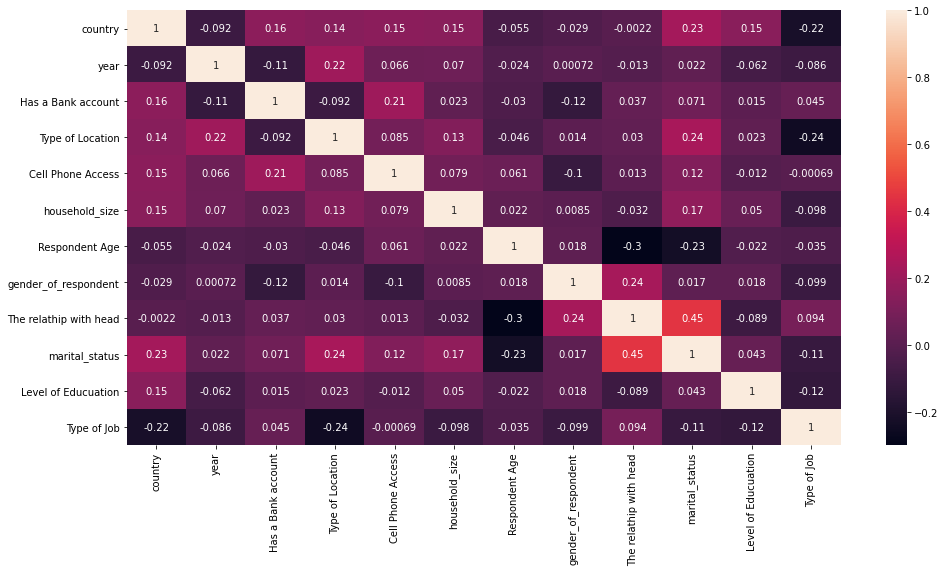

In [114]:
corr=df.corr()

fig, ax = plt.subplots(figsize=(16,8)) 
sns.heatmap(corr, 
        xticklabels=corr.columns,
    yticklabels=corr.columns, annot=True)
#We can see that there is no much correlation between the variables. 
#however people with cell phone tend to have bank account

In [115]:
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,2018,uniqueid_1,0,0,0,0,24,0,0,0,0,0
1,0,2018,uniqueid_2,1,0,1,1,70,0,1,1,1,1
2,0,2018,uniqueid_3,0,1,0,1,26,1,2,2,2,0
3,0,2018,uniqueid_4,1,0,0,1,34,0,1,0,3,2
4,0,2018,uniqueid_5,1,1,1,2,26,1,3,2,3,3


### Univariant analysis

### z-score and t-test

In [116]:
df["Respondent Age"].kurt()

-0.34845642333342486

In [117]:
df["Respondent Age"].skew()

0.6900585416985922

In [118]:
df["Respondent Age"].mean()

37.87963286713287

In [119]:
df["Respondent Age"].std()

15.305454552776293

In [120]:
df["Respondent Age"].var()

234.25693906710055

In [121]:
df["Respondent Age"].describe()

count    22880.000000
mean        37.879633
std         15.305455
min         16.000000
25%         26.000000
50%         35.000000
75%         48.000000
max         79.000000
Name: Respondent Age, dtype: float64

## Multivariant analysis using PCA 

In [122]:
#Create columns and features
X = df.drop(['year', 'Has a Bank account','uniqueid'],axis=1)
y = df['Has a Bank account']
print(X.head())
print("---------------------------------------------- \n Y")
print(y.head())

   country  Type of Location  Cell Phone Access  household_size  \
0        0                 0                  0               0   
1        0                 0                  1               1   
2        0                 1                  0               1   
3        0                 0                  0               1   
4        0                 1                  1               2   

   Respondent Age  gender_of_respondent  The relathip with head  \
0              24                     0                       0   
1              70                     0                       1   
2              26                     1                       2   
3              34                     0                       1   
4              26                     1                       3   

   marital_status  Level of Educuation  Type of Job  
0               0                    0            0  
1               1                    1            1  
2               2               

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [124]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [125]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [126]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.19073408, 0.1535837 , 0.11654971, 0.10216151, 0.09358965,
       0.09012083, 0.07851451, 0.06839435, 0.06568207, 0.0406696 ])

In [127]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [128]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [129]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

#with PCA component_no of 2, Our model has 86% accuracy

[[   0  630]
 [   0 3946]]
Accuracy 0.8623251748251748


## Linear Discriminative analysis 

In [130]:
# we will use X and y values used in PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [131]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [132]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [133]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [134]:
# Evaluating the Performance

#This one also gives us 86% accuracy

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('The LDA ccuracy ' + str(accuracy_score(y_test, y_pred)))

[[ 106  524]
 [ 103 3843]]
The LDA ccuracy 0.8629807692307693
